In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import cv2

import keras
from keras import models, layers
from keras.utils import np_utils
from sklearn.model_selection import train_test_split

import sqlite3
import pandasql as ps

In [2]:
images = glob.glob('Cleaned Car Set\*.jpg')

data = pd.DataFrame(images, columns=['filepath'])

data['brand'] = data['filepath'].apply(lambda x : x.split('_')[0].split('\\')[-1])

topBrands = data['brand'].value_counts().index.to_list()
topBrands

['Ford', 'Toyota', 'Nissan']

In [3]:
data['brand'].value_counts()

Ford      1962
Toyota    1858
Nissan     935
Name: brand, dtype: int64

selectedDF = ps.sqldf("SELECT * FROM data WHERE brand IN ('Chevrolet','Toyota','Ford','BMW','Nissan')")
selectedDF

selectedDF['brand'].index

In [116]:
X = []
y = []
for i in range(len(data)):
    filepath = data.loc[i,'filepath']
    img = plt.imread(filepath)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    X.append(cv2.resize(img, dsize=(200, 300), interpolation=cv2.INTER_AREA))
    y.append(data.loc[i,'brand'])

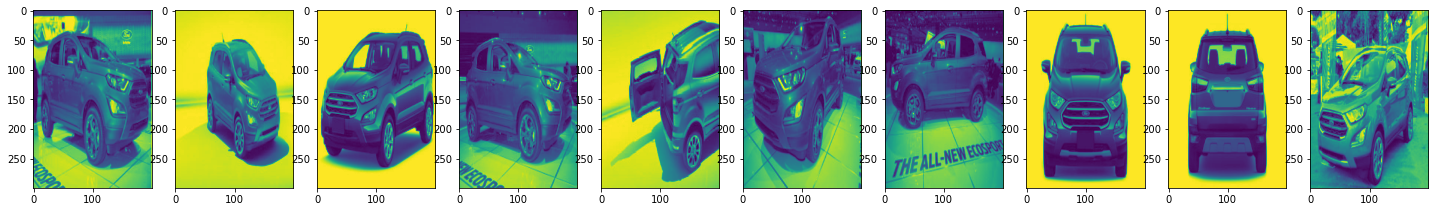

In [117]:
fig, axes = plt.subplots(1,10,figsize=(25,10))
for i in range(0,10):
    axes[i].imshow(X[i])

In [118]:
X = np.array(X)
X = X.astype('float32')
X = X / 255.0
X = X.reshape(-1,300,200,1)
y= np.array(pd.get_dummies(pd.DataFrame(y),columns=[0]))

X.shape, y.shape

((4755, 300, 200, 1), (4755, 3))

In [119]:
import tensorflow as tf

In [120]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [127]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=X_train.shape[1:], padding = 'same'),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.50),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.50),
    
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.50),
    layers.Dense(3, activation='softmax')
])

cnn.compile(optimizer='RMSprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnn.fit(X_train, y_train, epochs=15, validation_data=(X_test, y_test), verbose = 1)

Epoch 1/15


In [126]:
cnn.evaluate(X_test, y_test)

50/50 [==============================] - 3s 53ms/step - loss: 4.1200 - accuracy: 0.5465


[4.1199517250061035, 0.5464968085289001]

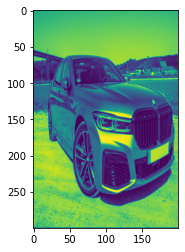

In [96]:
img = plt.imread('BMW_testimg.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.resize(img, dsize=(200, 300), interpolation=cv2.INTER_AREA)
plt.imshow(img)

In [97]:
img = img / 255

In [98]:
imgs = []
imgs.append(img)
imgs = np.array(imgs)
imgs = imgs.astype('float32')
imgs = imgs / 255.0
imgs = imgs.reshape(-1,300,200,1)

In [99]:
cnn.predict(imgs)

array([[0.18896517, 0.22344726, 0.17108868, 0.20064329, 0.21585558]],
      dtype=float32)

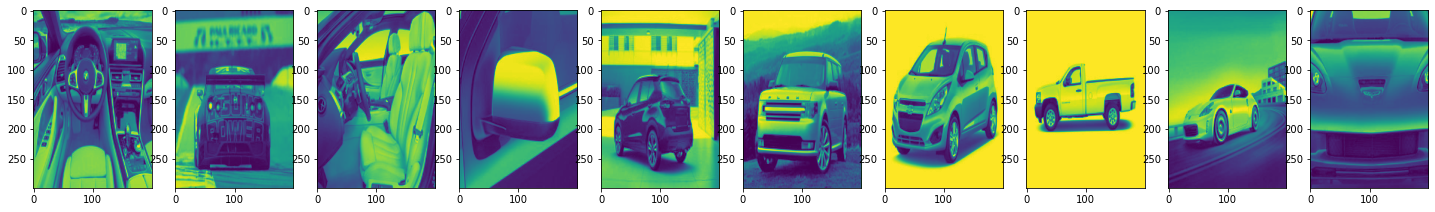

In [95]:
fig, axes = plt.subplots(1,10,figsize=(25,10))
for i in range(0,10):
    axes[i].imshow(X_test[i])

In [93]:
pd.DataFrame(y_test[:10]).style.highlight_max(color = 'lightgreen', axis = 1)

,0,1,2,3,4
0,1,0,0,0,0
1,0,0,0,1,0
2,1,0,0,0,0
3,0,1,0,0,0
4,0,0,0,1,0
5,0,0,1,0,0
6,0,1,0,0,0
7,0,1,0,0,0
8,0,0,0,1,0
9,0,1,0,0,0


In [94]:
pd.DataFrame(cnn.predict(X_test[:10])).style.highlight_max(color = 'lightgreen', axis = 1)

,0,1,2,3,4
0,0.999969,0.000027,0.000005,0.000000,0.000000
1,0.007910,0.000800,0.986897,0.002578,0.001815
2,1.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,1.000000,0.000000,0.000000,0.000000
4,0.996492,0.000000,0.000117,0.003391,0.000000
5,0.000052,0.000000,0.000000,0.999948,0.000000
6,0.000063,0.000649,0.000000,0.990312,0.008976
7,0.000000,0.936110,0.063844,0.000000,0.000046
8,0.000032,0.000000,0.000000,0.999968,0.000000
9,0.002234,0.594199,0.001662,0.052815,0.349090


In [101]:
input_shape = X_train.shape[1:]
model = models.Sequential()
model.add(layers.Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = X_train.shape[1:]))
model.add(layers.Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Dropout(0.25))


model.add(layers.Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(layers.Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(layers.Dropout(0.25))


model.add(layers.Flatten())
model.add(layers.Dense(256, activation = "relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(5, activation = "softmax"))
model.compile(loss=keras.losses.categorical_crossentropy, optimizer='rmsprop', metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size = 64,epochs = 12, shuffle=True, validation_data=(X_test,y_test),verbose = 1)

Epoch 1/12
232/232 [==============================] - 89s 370ms/step - loss: 1.6958 - accuracy: 0.2733 - val_loss: 1.4874 - val_accuracy: 0.3790
Epoch 2/12
232/232 [==============================] - 85s 366ms/step - loss: 1.3132 - accuracy: 0.4746 - val_loss: 1.9547 - val_accuracy: 0.3710
Epoch 3/12
232/232 [==============================] - 84s 364ms/step - loss: 0.9598 - accuracy: 0.6443 - val_loss: 1.0901 - val_accuracy: 0.6089
Epoch 4/12
232/232 [==============================] - 84s 363ms/step - loss: 0.6825 - accuracy: 0.7628 - val_loss: 0.9913 - val_accuracy: 0.6517
Epoch 5/12
232/232 [==============================] - 85s 367ms/step - loss: 0.4716 - accuracy: 0.8419 - val_loss: 1.3295 - val_accuracy: 0.6551
Epoch 6/12
232/232 [==============================] - 85s 366ms/step - loss: 0.3379 - accuracy: 0.8888 - val_loss: 1.4752 - val_accuracy: 0.6721
Epoch 7/12
232/232 [==============================] - 84s 363ms/step - loss: 0.2731 - accuracy: 0.9133 - val_loss: 1.6235 - val_ac

In [102]:
model.evaluate(X_test, y_test)

228/228 [==============================] - 11s 47ms/step - loss: 2.3373 - accuracy: 0.6832


[2.3372693061828613, 0.6832144856452942]

In [103]:
model.save('otherModel')

INFO:tensorflow:Assets written to: otherModel\assets


In [104]:
cnn.save('personalModel_uncleaned')

INFO:tensorflow:Assets written to: personalModel_uncleaned\assets


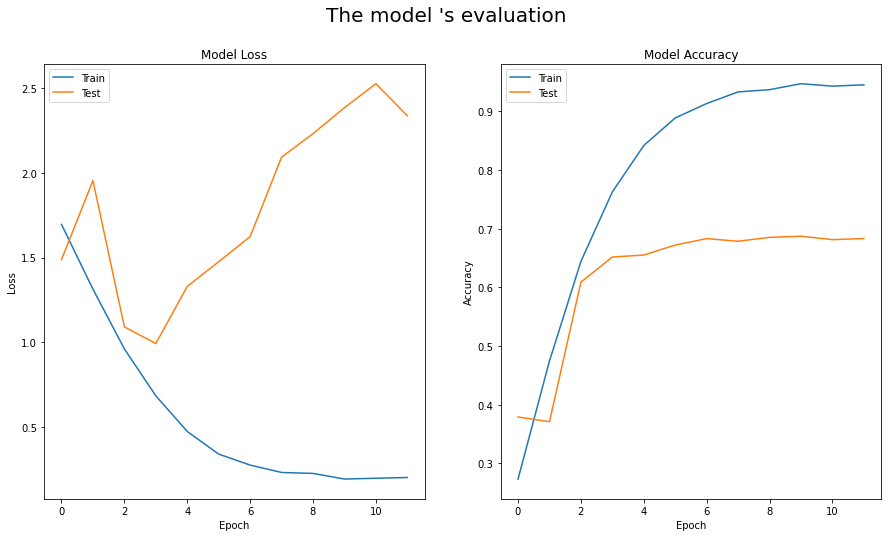

In [105]:
fig,axes = plt.subplots(1,2, figsize=(15,8))
fig.suptitle("The model 's evaluation ",fontsize=20)
axes[0].plot(history.history['loss'])
axes[0].plot(history.history['val_loss'])
axes[0].set_title('Model Loss')
axes[0].set_ylabel('Loss')
axes[0].set_xlabel('Epoch')
axes[0].legend(['Train','Test'])


axes[1].plot(history.history['accuracy'])
axes[1].plot(history.history['val_accuracy'])
axes[1].set_title('Model Accuracy')
axes[1].set_ylabel('Accuracy')
axes[1].set_xlabel('Epoch')
axes[1].legend(['Train','Test'])
plt.show()